In [55]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [56]:
data = pd.read_csv('all_member_segment.csv')

In [57]:
X = data[:][['sales','num_item','num_category','num_sub_category','hhh_age_desc','nbr_children_desc','autorenew_ind','payroll_deduct_ind','days_dif']]
X['days_dif']=X['days_dif'].fillna(396)
X = X.fillna(X.mean())
Y = data['RENEW_IND']

In [58]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [59]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=1000)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [60]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os     

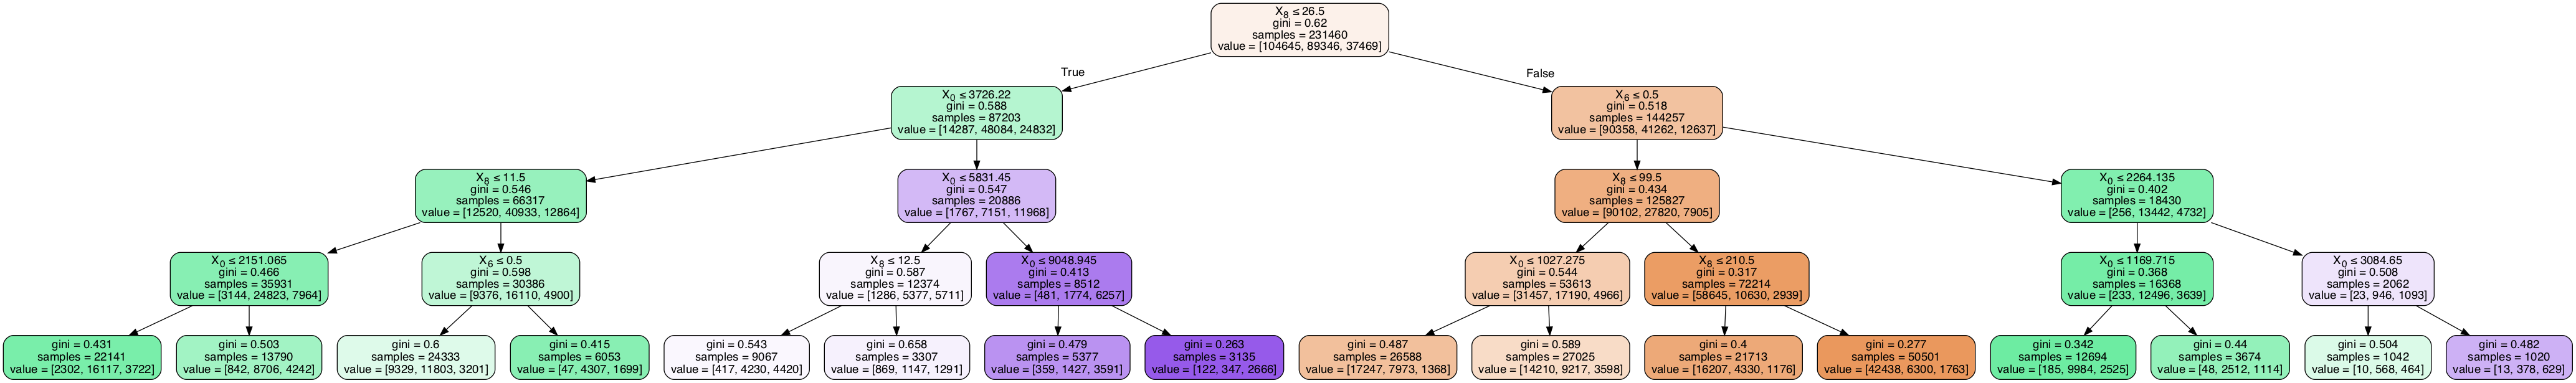

In [61]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [62]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=1000)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1000, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

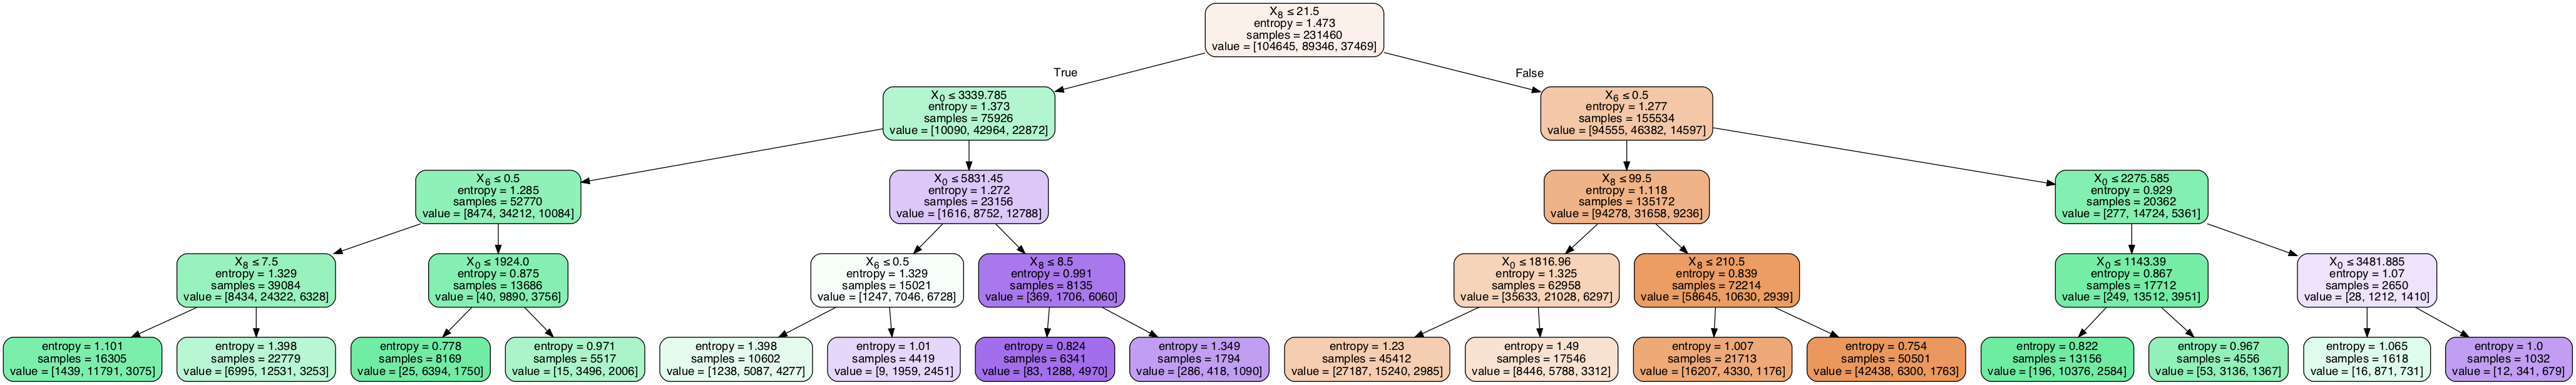

In [63]:
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [64]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 2])

In [65]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 1, 0, ..., 0, 1, 2])

In [66]:
print ("Gini Accuracy is ", accuracy_score(y_test,y_pred)*100)

Gini Accuracy is  67.42936144474207


In [67]:
print ("Entropy Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Entropy Accuracy is  67.44318672772833


In [68]:
X = data[:][['sales','num_item','num_category','num_sub_category','hhh_age_desc','nbr_children_desc','autorenew_ind','payroll_deduct_ind','days_dif']]
X['days_dif']=X['days_dif'].fillna(396)
X = X.fillna(X.mean())
Y = data['RENEW_IND']